# Import Data and Exploratory Data Analysis (EDA)

## Import Library and Dataset

In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Import Dataset
train_raw=pd.read_csv(r'D:\Jupyter\Datasets\train.csv')
test_raw=pd.read_csv(r'D:\Jupyter\Datasets\test.csv')
features_raw=pd.read_csv(r'D:\Jupyter\Datasets\features.csv')
stores_raw= pd.read_csv(r'D:\Jupyter\Datasets\stores.csv')

## View data sets

### Train.csv


In [3]:
#Head of the train csv
train_raw.head() 

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
#Attribute type of train csv
train_raw.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [5]:
#Number of instances and attributes
print(train_raw.shape)

(421570, 5)


### Features.csv


In [6]:
##Head of the feature csv
features_raw.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
#Attribute type of features csv
features_raw.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [8]:
#Number of instances and attributes
print(features_raw.shape)

(8190, 12)


### Store.csv

In [9]:
##Head of the store csv
stores_raw.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [10]:
#Attribute type of store csv
stores_raw.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [11]:
#Number of instances and attributes
print(stores_raw.shape)

(45, 3)


### Test.csv

In [12]:
##Head of the test csv
test_raw.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [13]:
#Attribute type of test csv
test_raw.dtypes

Store         int64
Dept          int64
Date         object
IsHoliday      bool
dtype: object

In [14]:
#Number of instances and attributes
test_raw.shape

(115064, 4)

## Merging the CSVs

Merging three CSV files together, included train, stores, and features.

In [15]:
train_merged = train_raw.merge(stores_raw, on=['Store'], how='inner').merge(features_raw, on=['Store','Date','IsHoliday'], how='inner')
print(train_merged.shape)


(421570, 16)


In [16]:
#Head of the train file after merged
train_merged.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


## Checking for Nas

In [17]:
#Checking for NAs
train_merged.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

- Currently, we can see that there are more than 200K+ missing data for MarkDown 1 to MarkDown5, therefore we would evaluate those variables in the later section to decide what to do with it.

## Replacing Na for Markdown 1-5

In [18]:
#replacing all Na for markdown 1-5 with 0 as mentioned in previous session.
train_merged=train_merged.fillna(0)
train_merged.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

# Exploratory Data Analysis (EDA)

## Descriptive Statistic

In [19]:
#Descriptive Statistic
round(train_merged.describe(),2)

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00
mean,22.20,44.26,15981.26,136727.92,60.09,3.36,2590.07,879.97,468.09,1083.13,1662.77,171.20,7.96
std,12.79,30.49,22711.18,60980.58,18.45,0.46,6052.39,5084.54,5528.87,3894.53,4207.63,39.16,1.86
min,1.00,1.00,-4988.94,34875.00,-2.06,2.47,0.00,-265.76,-29.10,0.00,0.00,126.06,3.88
25%,11.00,18.00,2079.65,93638.00,46.68,2.93,0.00,0.00,0.00,0.00,0.00,132.02,6.89
50%,22.00,37.00,7612.03,140167.00,62.09,3.45,0.00,0.00,0.00,0.00,0.00,182.32,7.87
75%,33.00,74.00,20205.85,202505.00,74.28,3.74,2809.05,2.20,4.54,425.29,2168.04,212.42,8.57
max,45.00,99.00,693099.36,219622.00,100.14,4.47,88646.76,104519.54,141630.61,67474.85,108519.28,227.23,14.31


## Outliers

(0.0, 1.0, 0.0, 1.0)

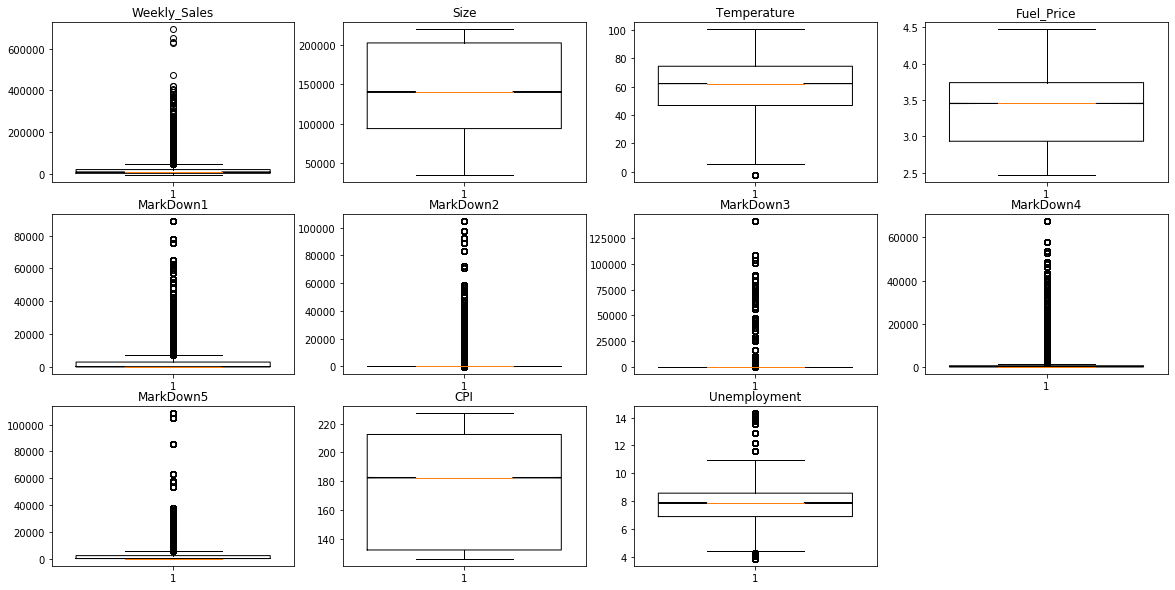

In [20]:
#Ploting the outliers for the different attributes
fig, ax= plt.subplots (3,4,figsize=(20,10))

ax[0,0].boxplot(train_merged.Weekly_Sales,'compact',widths=(.8))
ax[0,0].title.set_text('Weekly_Sales')

ax[0,1].boxplot(train_merged.Size,'compact',widths=(.8))
ax[0,1].title.set_text('Size')

ax[0,2].boxplot(train_merged.Temperature,'compact',widths=(.8)) 
ax[0,2].title.set_text('Temperature')

ax[0,3].boxplot(train_merged.Fuel_Price,'compact',widths=(.8))
ax[0,3].title.set_text('Fuel_Price')

ax[1,0].boxplot(train_merged.MarkDown1,'compact',widths=(.8))
ax[1,0].title.set_text('MarkDown1')

ax[1,1].boxplot(train_merged.MarkDown2,'compact',widths=(.8))
ax[1,1].title.set_text('MarkDown2')

ax[1,2].boxplot(train_merged.MarkDown3,'compact',widths=(.8))
ax[1,2].title.set_text('MarkDown3')

ax[1,3].boxplot(train_merged.MarkDown4,'compact',widths=(.8))
ax[1,3].title.set_text('MarkDown4')

ax[2,0].boxplot(train_merged.MarkDown5,'compact',widths=(.8))
ax[2,0].title.set_text('MarkDown5')

ax[2,1].boxplot(train_merged.CPI,'compact',widths=(.8))
ax[2,1].title.set_text('CPI')

ax[2,2].boxplot(train_merged.Unemployment,'compact',widths=(.8))
ax[2,2].title.set_text('Unemployment')

ax[-1, -1].axis('off')

## Top 5 Sales for Stores

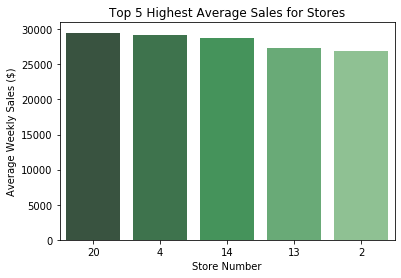

In [21]:
#Plotting top 5 sales for stores
weekly_sales_stores = train_merged['Weekly_Sales'].groupby(train_merged['Store']).mean()
largest_5_Store=weekly_sales_stores.nlargest(5,)
sns.barplot(largest_5_Store.index,largest_5_Store.values,order=largest_5_Store.sort_values(ascending=False)\
            .index,palette="Greens_d").set_title("Top 5 Highest Average Sales for Stores")
plt.xlabel('Store Number')
plt.ylabel('Average Weekly Sales ($)')
plt.show()

## Bottom 5 Sales Stores

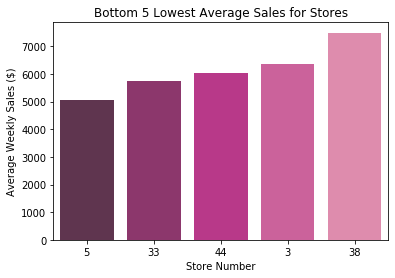

In [22]:
#Plotting bottom 5 sales for stores
weekly_sales_stores = train_merged['Weekly_Sales'].groupby(train_merged['Store']).mean()
smallest_5_Store=weekly_sales_stores.nsmallest(5,)
sns.barplot(smallest_5_Store.index,smallest_5_Store.values,order=smallest_5_Store.sort_values().index,palette="RdPu_d")\
            .set_title("Bottom 5 Lowest Average Sales for Stores")
plt.xlabel('Store Number')
plt.ylabel('Average Weekly Sales ($)')
plt.show()

## Top 5 Average Sales for Departments

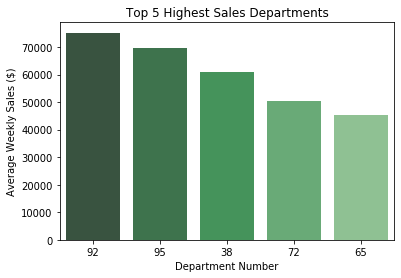

In [23]:
#Plotting top 5 sales for departments
weekly_sales_dept = train_merged['Weekly_Sales'].groupby(train_merged['Dept']).mean()
largest_5_Dept=weekly_sales_dept.nlargest(5,)
ax= sns.barplot(largest_5_Dept.index,largest_5_Dept.values,order=largest_5_Dept.sort_values(ascending=False)\
            .index,palette="Greens_d").set_title("Top 5 Highest Sales Departments")
plt.xlabel('Department Number')
plt.ylabel('Average Weekly Sales ($)')

plt.show()

## Bottom 5 Average Sales for Departments

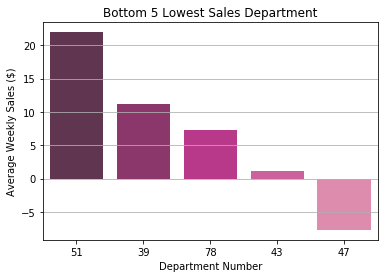

In [24]:
#Plotting bottom 5 sales for Departments 
weekly_sales_dept = train_merged['Weekly_Sales'].groupby(train_merged['Dept']).mean()
smallest_5_Dept=weekly_sales_dept.nsmallest(5,)
plt.grid()
sns.barplot(smallest_5_Dept.index,smallest_5_Dept.values,order=smallest_5_Dept.sort_values(ascending=False)\
            .index,palette="RdPu_d").set_title("Bottom 5 Lowest Sales Department")
plt.xlabel('Department Number')
plt.ylabel('Average Weekly Sales ($)')

plt.show()

## Comparison of Stores and Departments in Average Weekly Sales

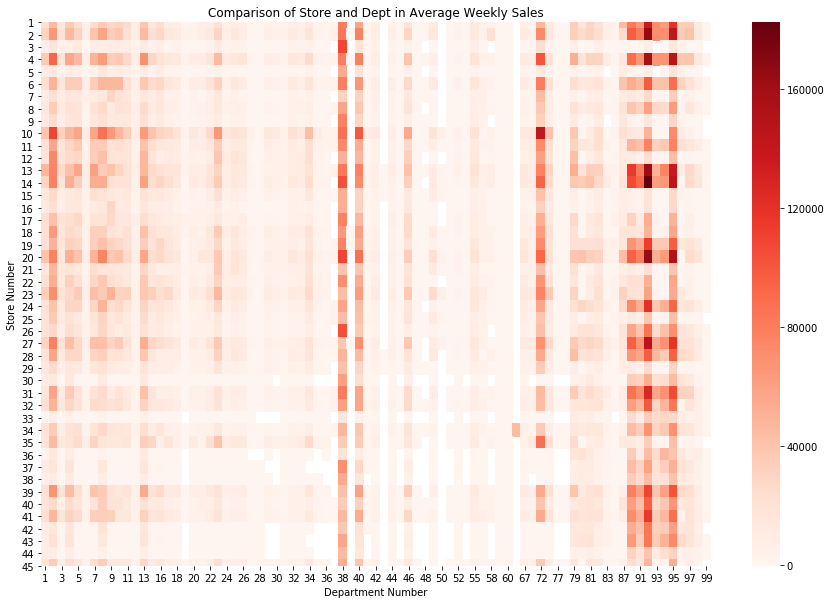

In [25]:
#dataframe for sales by department
dept_sales=train_merged.groupby(by=['Store','Dept'])['Weekly_Sales'].mean().to_frame().reset_index()
plt.subplots(figsize=(15,10))
sns.heatmap(dept_sales.pivot(index='Store',columns='Dept',values='Weekly_Sales'),cmap="Reds")
plt.xlabel('Department Number')
plt.ylabel('Store Number')
plt.title('Comparison of Store and Dept in Average Weekly Sales')
plt.show()

## Weekly Sales Comparison for the Dataset (2010,2011,2012)

Before we can proceed and seperate three years of data for comparison, follow code are used, and created the 'Year' and 'Week'.

In [26]:
#Setting data frame date format and added two new coloumn 'Year' and 'Week' for seperating the data to visualize
train_merged.Date = pd.to_datetime(train_merged.Date,format='%Y-%m-%d')
train_merged['Year']=pd.DatetimeIndex(train_merged['Date']).year
train_merged['Week']=train_merged['Date'].dt.week

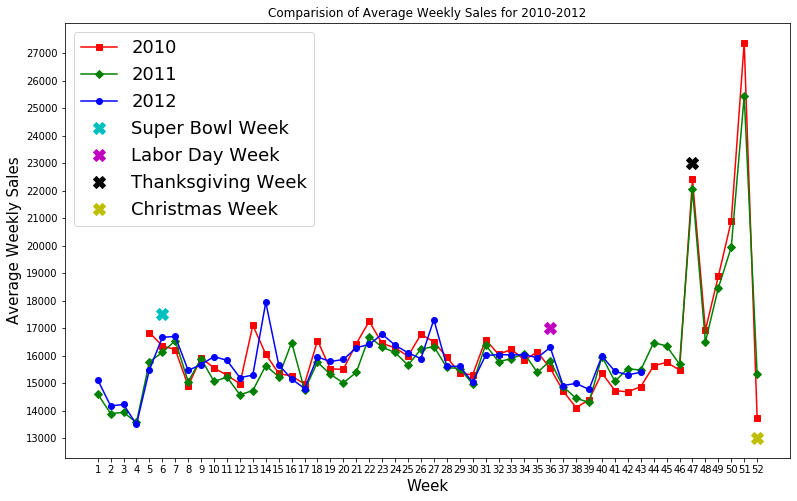

In [27]:
#visualize the average weekly sales for the year of 2010, 2011 and 2012
Sales2010=train_merged[train_merged['Year']==2010]
Sales2010 = Sales2010['Weekly_Sales'].groupby(Sales2010['Week']).mean()

Sales2011=train_merged[train_merged['Year']==2011]
Sales2011 = Sales2011['Weekly_Sales'].groupby(Sales2011['Week']).mean()

Sales2012=train_merged[train_merged['Year']==2012]
Sales2012 = Sales2012['Weekly_Sales'].groupby(Sales2012['Week']).mean()
plt.subplots(figsize=(13,8))


plt.plot(Sales2010,color='red',marker='s')
plt.plot(Sales2011,color='green',marker='D')
plt.plot(Sales2012,color='blue',marker='o')


plt.plot(6,17500,'Xc',markersize=12)
plt.plot(36,17000,'Xm',markersize=12)
plt.plot(47,23000,'Xk',markersize=12)
plt.plot(52,13000,'Xy',markersize=12)


plt.xticks(np.arange(1,53,step=1))
plt.yticks(np.arange(13000,28000,step=1000))
plt.legend(['2010','2011','2012','Super Bowl Week','Labor Day Week','Thanksgiving Week','Christmas Week'],\
           loc='best',fontsize=18)
plt.xlabel('Week',fontsize=15)
plt.ylabel('Average Weekly Sales', fontsize=15)

plt.title('Comparision of Average Weekly Sales for 2010-2012')


plt.show()


## Holiday Vs Weekly_Sales

Text(0.5, 1.0, 'Weekly Sales Comparison for Holiday or Not')

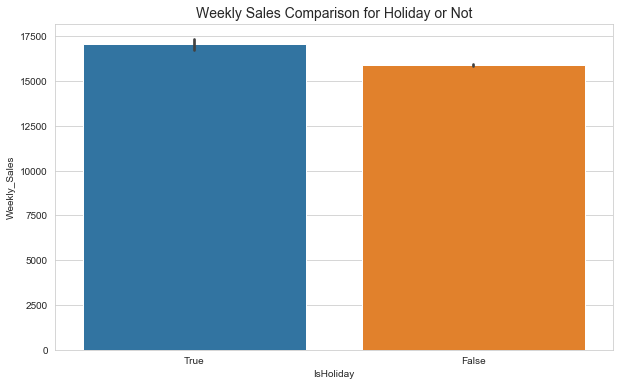

In [28]:
#Comparing the attribute Holiday and Weekly sales using bar plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='IsHoliday', y='Weekly_Sales',data=train_merged, order=[True,False])\
            .set_title("Weekly Sales Comparison for Holiday or Not",fontsize=14)

Text(0.5, 1.0, 'Weekly Sales Comparison for Holiday or Not')

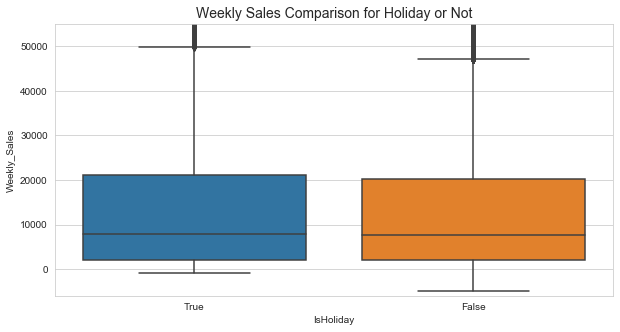

In [29]:
#Same as previous step, just in a boxplot and zoomed in for easier visualize
fig, ax = plt.subplots(figsize=(10, 5))
plt.ylim([-6000,55000])
sns.boxplot(x='IsHoliday', y='Weekly_Sales',data=train_merged,order=[True,False])\
            .set_title("Weekly Sales Comparison for Holiday or Not",fontsize=14)
#zoomed in

## Comparing Type of Stores

In [30]:
#Total of 45 stores, and seeing how many store each "Type" has
count=stores_raw.set_index(["Type","Size"]).count(level="Type")
print(count)

      Store
Type       
A        22
B        17
C         6


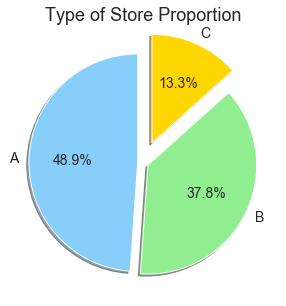

In [31]:
#Same as previous step, but plotting in pie chart
labels=count.index
colors=['lightskyblue','lightgreen','gold']
explode=[0.05,0.05,0.2]
fig,ax1=plt.subplots(figsize=(5,5))
ax1.pie(count['Store'],labels=labels,colors=colors,explode=explode,startangle=90,autopct='%.1f%%',textprops={'fontsize': 14},shadow=True)
plt.title("Type of Store Proportion", fontsize=18)
plt.show()

- Walmart did not tell us what is Type means, as for now, but as for now, around 49% of stores are classified as type A; 38% classified as type B; and 13% for type C. We will dig into what are Type in the later session.

## Compare Type and Weekly Sales

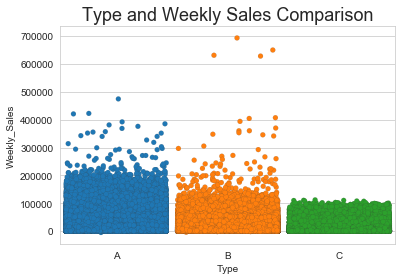

In [32]:
#Using strip plot to compare type and weekly sales
sns.stripplot('Type','Weekly_Sales',data=train_merged,linewidth=0.1,jitter=0.45)
plt.title("Type and Weekly Sales Comparison", fontsize=18)
plt.show()

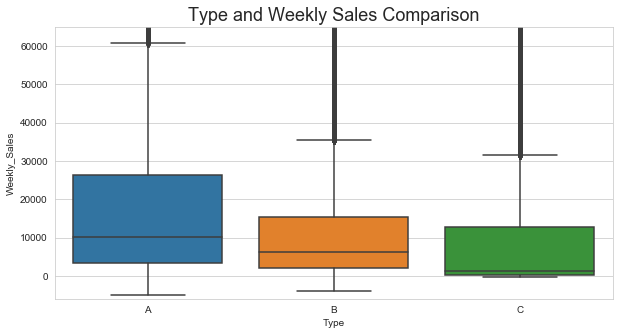

In [33]:
#Same as previous step, but using boxplot for easier visualization
fig, ax = plt.subplots(figsize=(10, 5))
plt.ylim([-6000,65000])
sns.boxplot('Type','Weekly_Sales',data=train_merged)
plt.title("Type and Weekly Sales Comparison", fontsize=18)
plt.show()

## Compare Type and Sizes

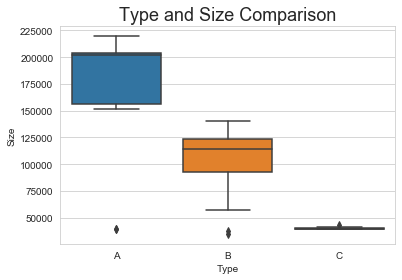

In [34]:
#Comparing type and store size in box plot
sns.boxplot('Type','Size',data=stores_raw)
plt.title("Type and Size Comparison", fontsize=18)
plt.show()

# Data Manipulating

- After exploring the data in the above sections, this section would modify the merged file in format and deleting some irrelavant variables.

## Replace "Type" from A,B,C to 3,2,1

In [35]:
#In the type attribute, replacing the letter A,B,C to 3,2,1 respectively
train_merged2=train_merged
train_merged2.Type=train_merged.Type.apply(lambda x:3 if x=='A' else(2 if x=='B' else 1))
train_merged2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Week
0,1,1,2010-02-05,24924.50,False,3,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,5
1,1,2,2010-02-05,50605.27,False,3,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,5
2,1,3,2010-02-05,13740.12,False,3,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,5
3,1,4,2010-02-05,39954.04,False,3,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,5
4,1,5,2010-02-05,32229.38,False,3,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,5


- In the previous section, we can see that type ABC are related to sales level and store size, we would replace it with from A,B,C to 3,2,1 instead as Type A store generated the most sales, then Type B, then lowest is Type C.

## Replace "IsHoliday" from True and False to 1 and 0

In [36]:
#In the IsHoliday attribute, replacing True and False to 1 and 0
train_merged3= train_merged2.applymap(lambda x: 1 if x == True else x)
train_merged3= train_merged2.applymap(lambda x: 0 if x == False else x)
train_merged3['IsHoliday']=train_merged3.IsHoliday.astype(int)
train_merged3.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Week
0,1,1,2010-02-05,24924.50,0,3,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,5
1,1,2,2010-02-05,50605.27,0,3,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,5
2,1,3,2010-02-05,13740.12,0,3,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,5
3,1,4,2010-02-05,39954.04,0,3,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,5
4,1,5,2010-02-05,32229.38,0,3,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,5


## Modify "IsHoliday" Value for Week 51 and 52

In [37]:
#Switching the IsHoliday value of Week 51 and Week 52 to 1 and 0 respecitvely 
train_merged4=train_merged3

for x in train_merged4.index: #changing 1 to 0 for the week of 52
    Week = train_merged4.at[x, "Week"]
    if Week == 52:
        train_merged4.at[x, "IsHoliday"] = 0
        
for x in train_merged4.index: #changing 0 to 1 for the week of 51
    Week = train_merged4.at[x, "Week"]
    if Week == 51:
        train_merged4.at[x, "IsHoliday"] = 1

## Making the "Date" as index

In [38]:
#Changing and make Date as the index of the train.csv
train_merged5=train_merged4
train_merged5.Date = pd.to_datetime(train_merged5.Date,format='%Y-%m-%d')
train_merged5.index = train_merged5.Date
train_merged5 = train_merged5.drop('Date', axis=1)
train_merged5.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Week
Date,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,0,3,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,5
2010-02-05,1,2,50605.27,0,3,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,5
2010-02-05,1,3,13740.12,0,3,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,5
2010-02-05,1,4,39954.04,0,3,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,5
2010-02-05,1,5,32229.38,0,3,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,5


## Visualizing the Correlations with Heat Map

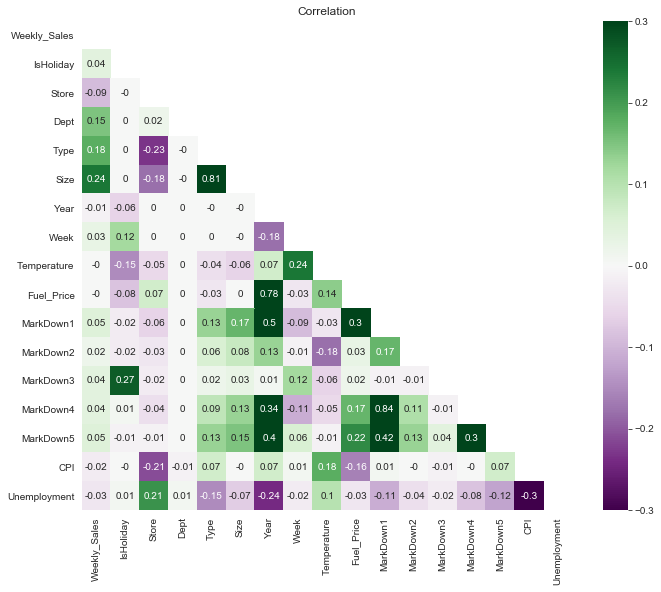

In [39]:
#Creating heatmap to see correlations after adjustments in the previous data manipulating steps
matrix=train_merged4[['Weekly_Sales','IsHoliday','Store','Dept','Type','Size','Year','Week','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3',\
                          'MarkDown4','MarkDown5','CPI','Unemployment']]
f, ax = plt.subplots(figsize=(11, 9))
matrix1 = np.triu(matrix.corr())
sns.heatmap(matrix.corr().round(2), annot=True,cmap='PRGn',mask=matrix1,vmin=-.3, vmax=.3)

ax.set_ylim([17,0])
plt.title('Correlation')
plt.show()

## Dropping Coloumns for MarkDown1-5, Temperature, Fuel_Price, CPI and Unemployment

In [40]:
#Drop coloumns from MarkDown1-5, since there are many missing value and only have impact to sales when there are Holiday events.
train_final=train_merged5.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Temperature','Fuel_Price',\
                               'CPI','Unemployment'],axis=1)
train_final.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Year,Week
Date,,,,,,,,
2010-02-05,1,1,24924.50,0,3,151315,2010,5
2010-02-05,1,2,50605.27,0,3,151315,2010,5
2010-02-05,1,3,13740.12,0,3,151315,2010,5
2010-02-05,1,4,39954.04,0,3,151315,2010,5
2010-02-05,1,5,32229.38,0,3,151315,2010,5


## Creating the Final form of the Dataset

In [41]:
#Creating the final version of train csv for later use
train_final.to_csv(r'D:\Jupyter\Merged\train_final.csv')